In [11]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

set_config(transform_output="pandas")
#load in data
sacramento = pd.read_csv("dataset/sacramento.csv")

In [12]:
sacramento_train, sacramento_test = train_test_split(sacramento, train_size= 0.75, random_state=42, shuffle= True)

In [13]:
# split training data into X and y
X_train = sacramento_train[["sq__ft"]]
y_train = sacramento_train["price"]

In [14]:
#extra after class : average weighted by distance
knn_regressor = KNeighborsRegressor(n_neighbors= 1, weights="distance")

param_grid = {
    "n_neighbors" : range(1,201,3)
}
#intialize our grid search
sacr_gridsearch = GridSearchCV(
   estimator = knn_regressor,
   param_grid= param_grid,
   cv = 5 ,
   scoring = "r2"
)
#fit our grid search
sacr_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=KNeighborsRegressor(n_neighbors=1, weights='distance'),
             param_grid={'n_neighbors': range(1, 201, 3)}, scoring='r2')

In [15]:
results = pd.DataFrame(sacr_gridsearch.cv_results_).sort_values(
    by= "rank_test_score"
)
#only for neg rmspe
results["mean_test_score"] = results["mean_test_score"].abs()
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,0.002998,0.000002,0.004202,0.000750,43,{'n_neighbors': 43},0.517844,0.268314,0.470261,0.477775,0.056661,0.358171,0.173981,1
21,0.002599,0.000490,0.005002,0.000895,64,{'n_neighbors': 64},0.522065,0.266488,0.460596,0.475485,0.064962,0.357919,0.170582,2
20,0.003001,0.001096,0.003999,0.000632,61,{'n_neighbors': 61},0.521872,0.266881,0.461828,0.475815,0.062980,0.357875,0.171379,3
22,0.003061,0.001222,0.004000,0.000631,67,{'n_neighbors': 67},0.521882,0.265958,0.460480,0.474992,0.065666,0.357796,0.170281,4
16,0.002599,0.000489,0.004200,0.001168,49,{'n_neighbors': 49},0.519462,0.267161,0.466320,0.476800,0.058703,0.357689,0.173059,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.004600,0.001355,0.004800,0.001166,13,{'n_neighbors': 13},0.492553,0.257693,0.476342,0.451156,0.000023,0.335553,0.187871,63
3,0.005599,0.003199,0.012800,0.010906,10,{'n_neighbors': 10},0.479113,0.247366,0.474928,0.441027,-0.018248,0.324837,0.191592,64
2,0.005000,0.001415,0.012600,0.015744,7,{'n_neighbors': 7},0.461290,0.237289,0.468049,0.415778,-0.040082,0.308465,0.193334,65
1,0.003999,0.001096,0.006401,0.001357,4,{'n_neighbors': 4},0.433726,0.213792,0.447794,0.370831,-0.098677,0.273493,0.203767,66


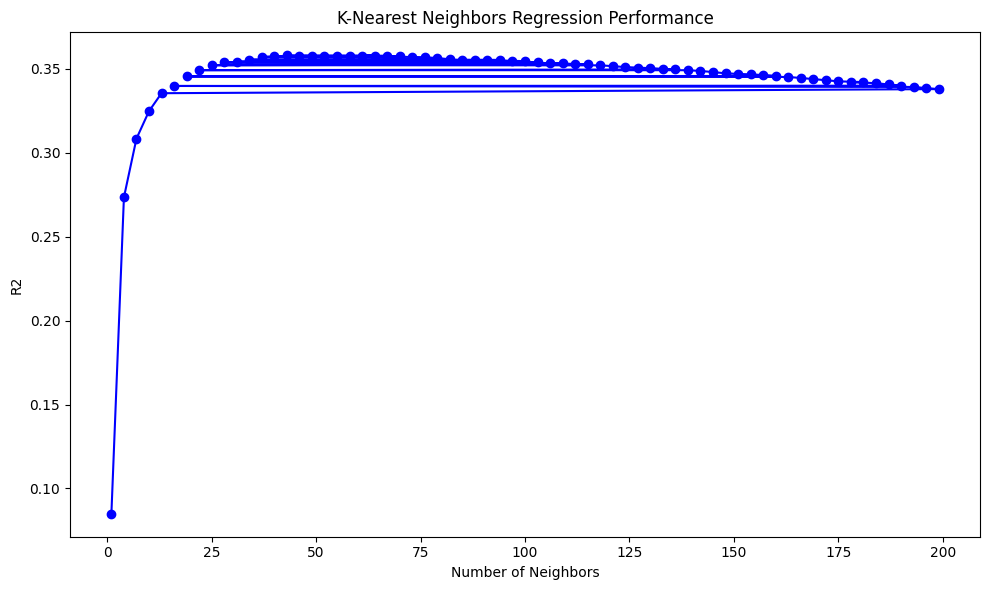

In [16]:
#Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(results['param_n_neighbors'], results['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('R2')
plt.title('K-Nearest Neighbors Regression Performance')
plt.tight_layout()
plt.show()

In [17]:
sacr_gridsearch.best_params_

{'n_neighbors': 43}

In [18]:
#make predictions on the test set
sacramento_test["predicted"] = sacr_gridsearch.predict(sacramento_test[["sq__ft"]])

rmspe = mean_squared_error(
    y_true = sacramento_test["price"],
    y_pred = sacramento_test["predicted"]
)**(1/2)
rmspe

85070.54635657773

In [19]:
r2 = r2_score(
    y_true = sacramento_test["price"],
    y_pred= sacramento_test["predicted"]   
)
r2

0.33726360815465595

c:\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


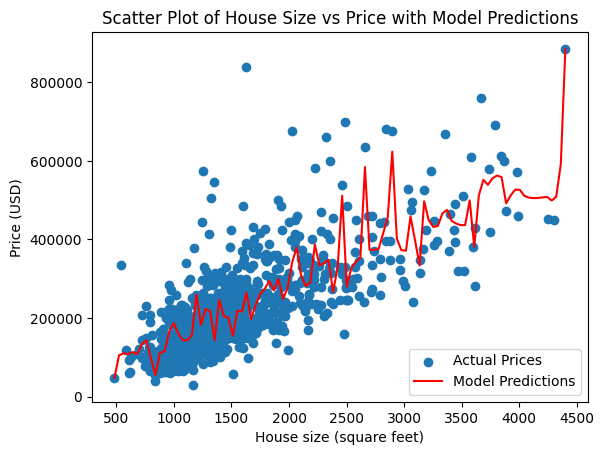

In [20]:
# Generate a range of house sizes for prediction
sizes = np.linspace(sacramento["sq__ft"].min(), sacramento["sq__ft"].max(), 100).reshape(-1, 1)

# Predict house prices for these sizes using the best model from GridSearchCV
predicted_prices = sacr_gridsearch.predict(sizes)

# Plot the original data
plt.scatter(sacramento["sq__ft"], sacramento["price"], label="Actual Prices")

# Plot the model predictions as a line
plt.plot(sizes, predicted_prices, color='red', label="Model Predictions")

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel("Price (USD)")
plt.title("Scatter Plot of House Size vs Price with Model Predictions")
plt.legend()
plt.show();